In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df.set_index('date', inplace=True)


# Clean data
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(25,5))
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.plot(df.index, df['value'], color='tab:blue')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot

    df_bar = df.reset_index()
    df_bar['year'] = df_bar['date'].dt.year
    df_bar['month'] = df_bar['date'].dt.month
    df_average = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Draw bar plot
    fig = df_average.plot(kind='bar', figsize=(15,15)).figure
    meses = ['January', 'February', 'March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(labels=meses)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

    
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]

    # Draw box plots (using Seaborn)
    year_box = pd.melt(df_box, id_vars='year', value_vars='value', value_name='Valores Anuales')
    month_box = pd.melt(df_box, id_vars='month', value_vars='value', value_name='Valores Mensuales')

    fig, ax = plt.subplots(1,2, figsize=(20,5))
    #my_order = ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='year', y='Valores Anuales', ax= ax[0], data=year_box)
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_ylabel('Page Views')
    ax[0].set_xlabel('Year')

    sns.boxplot(x='month', y='Valores Mensuales', ax=ax[1], data=month_box)
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_ylabel('Page Views')
    ax[1].set_xlabel('Month')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

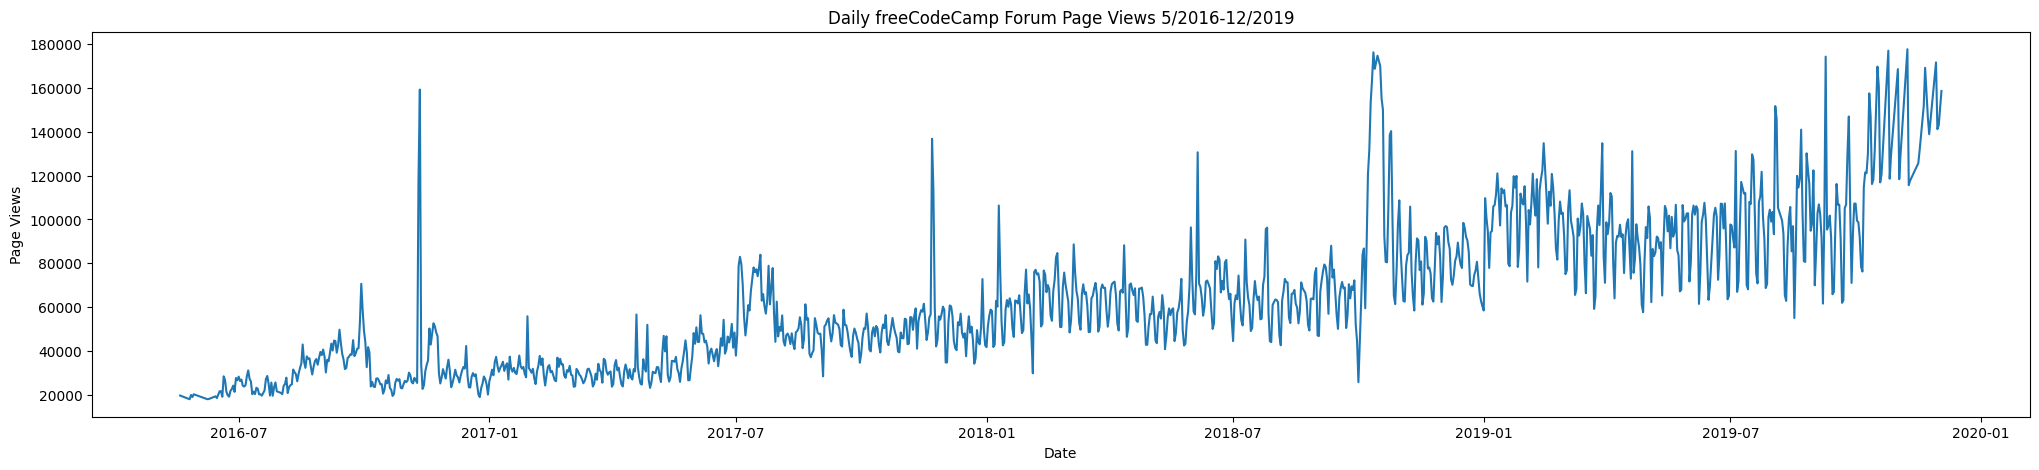

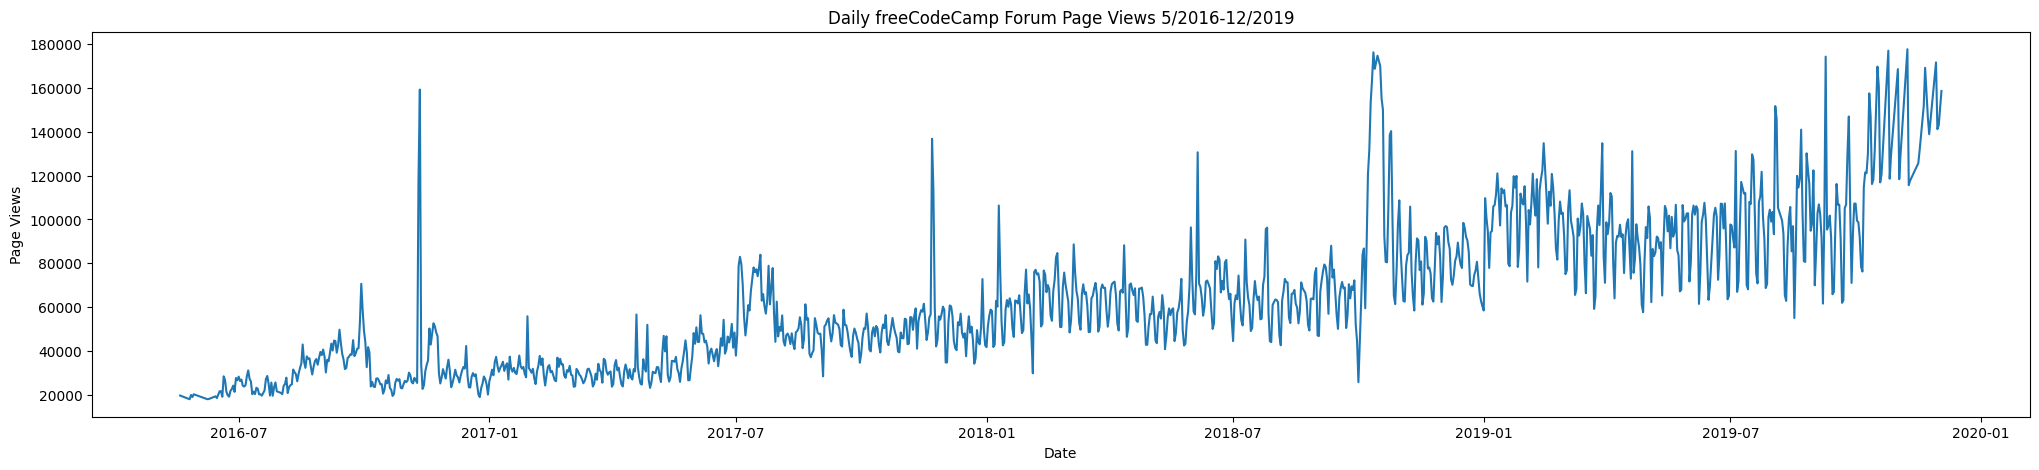

In [64]:
draw_line_plot()

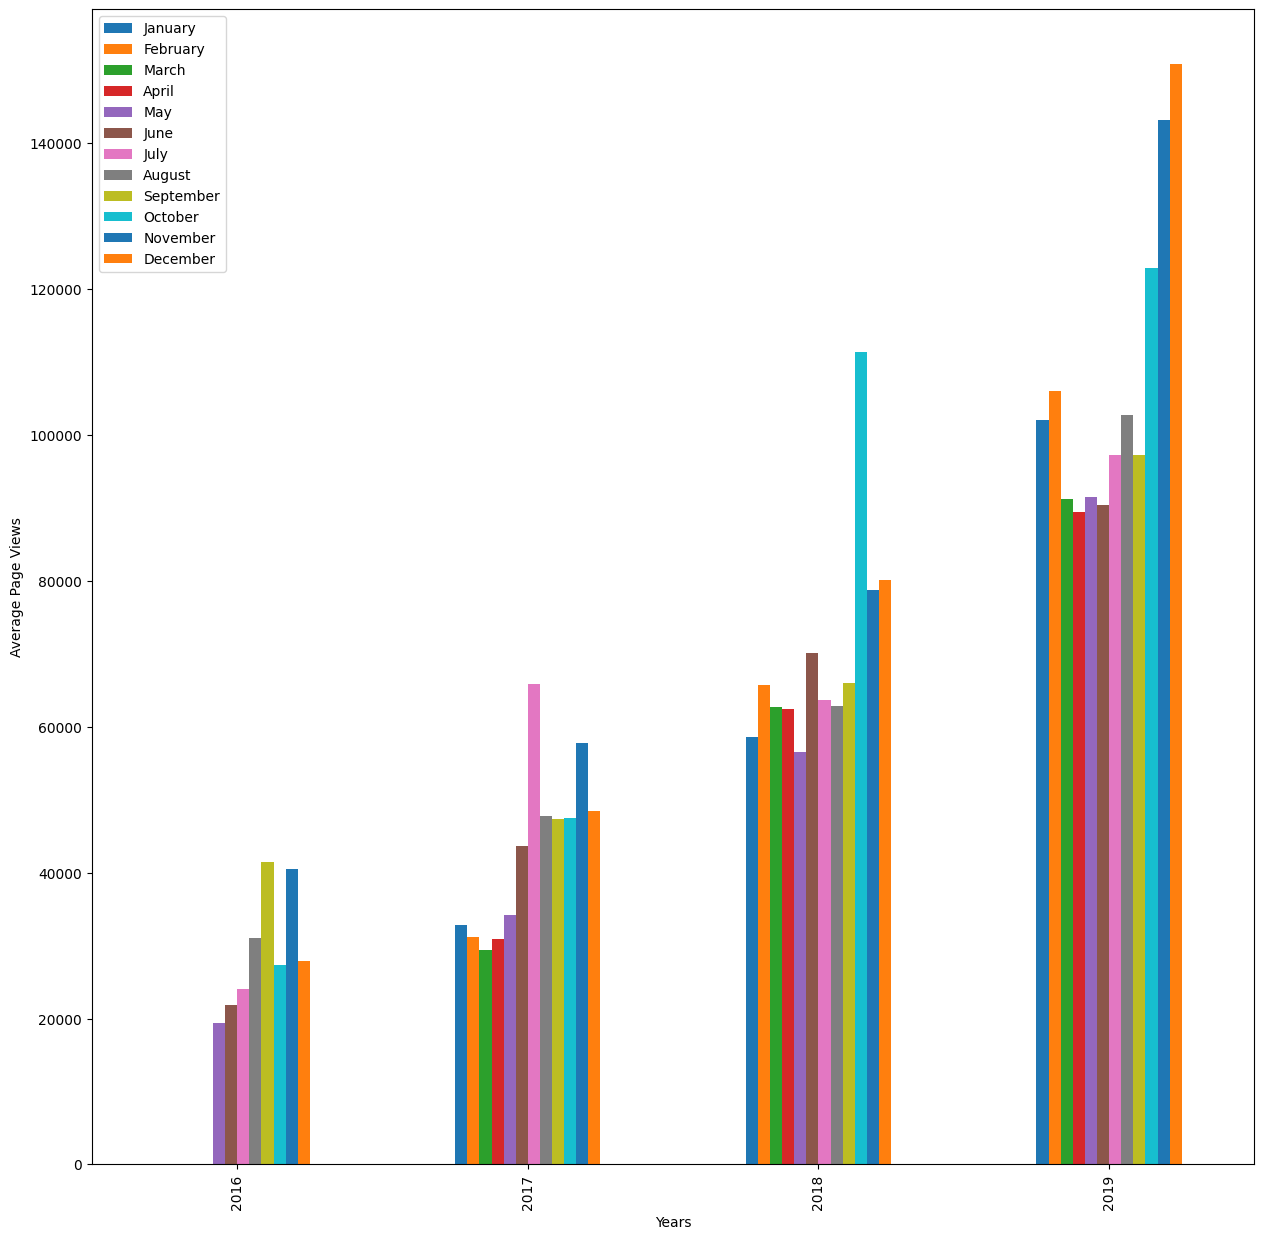

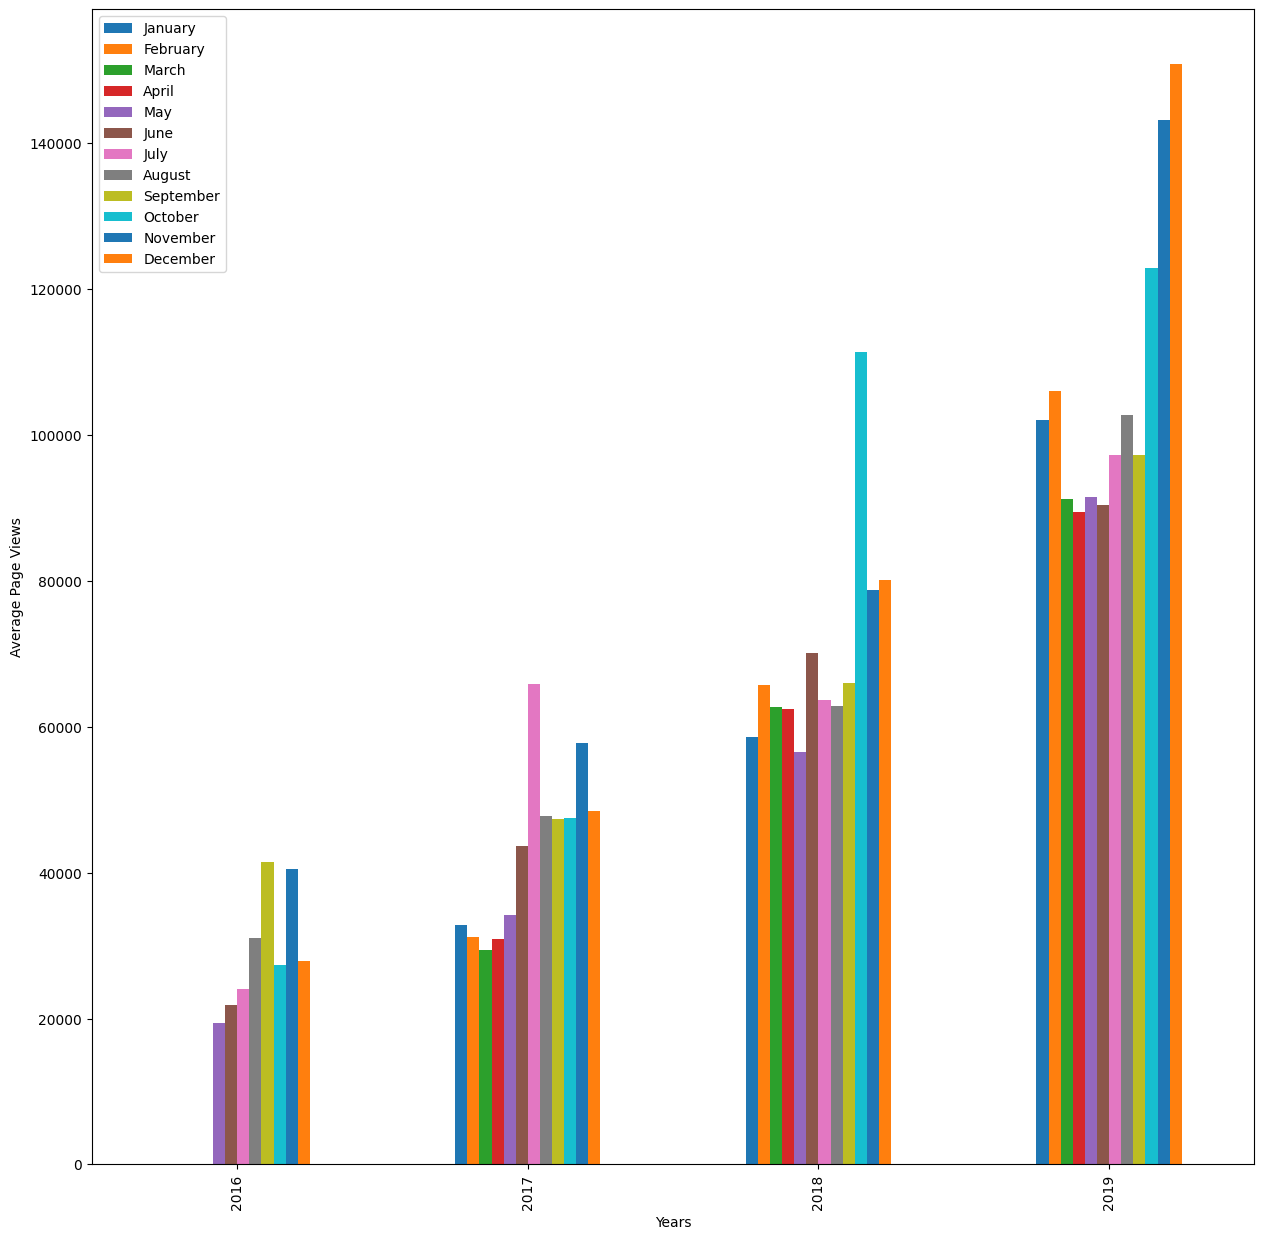

In [65]:
draw_bar_plot()

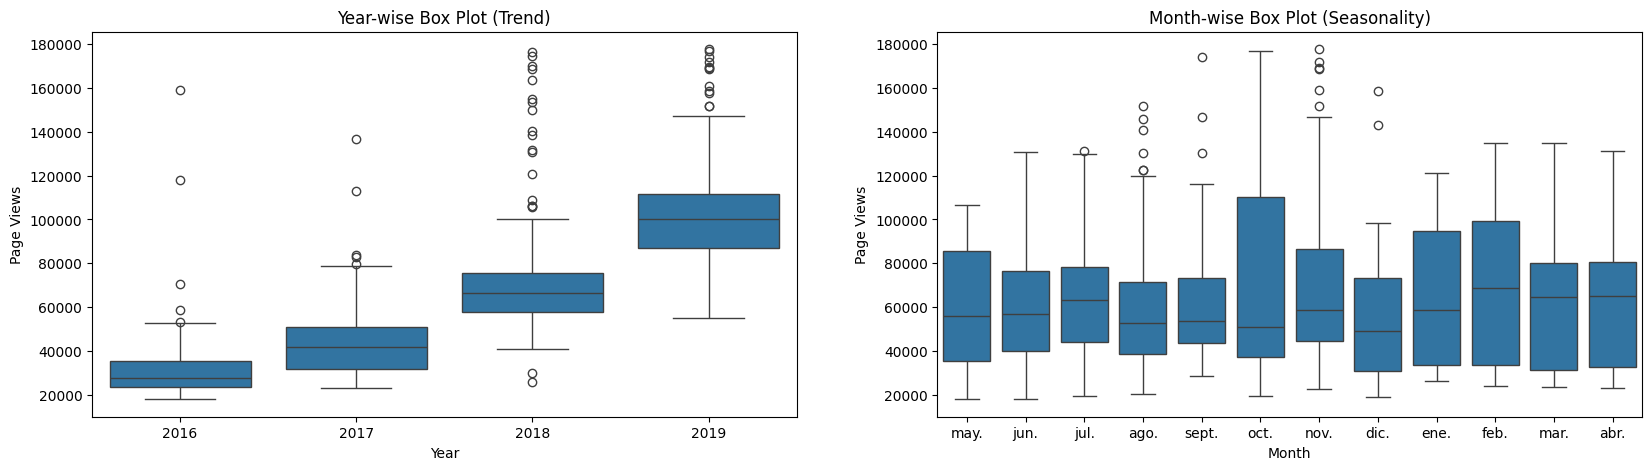

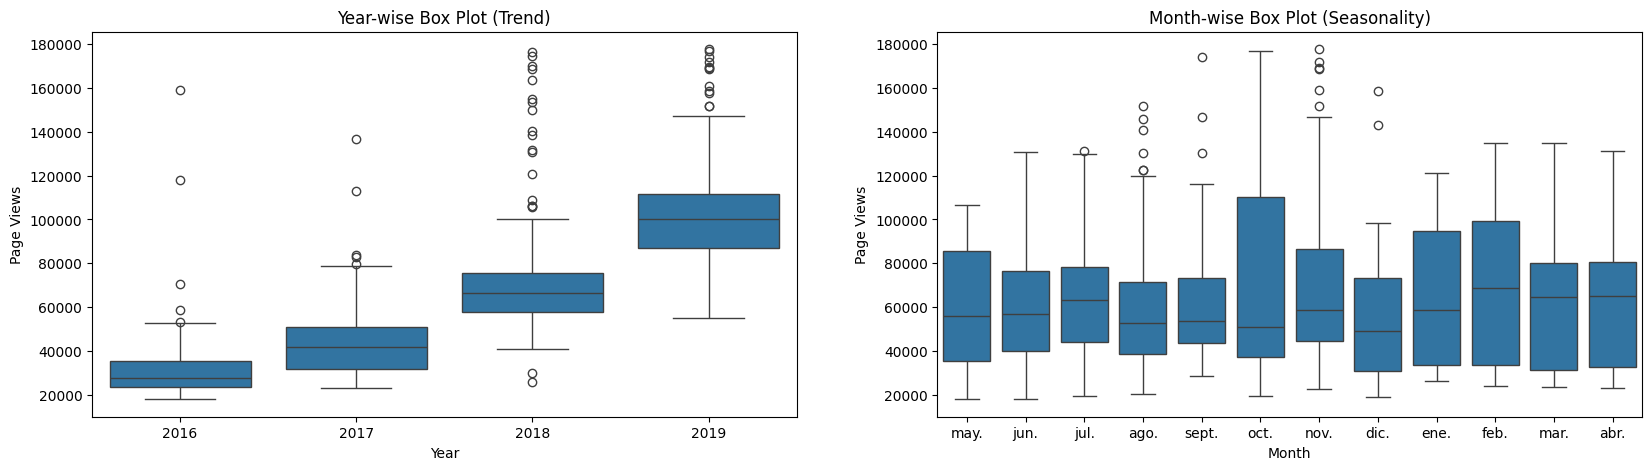

In [66]:
draw_box_plot()